# Comparison Between MTS-Style Transfer and Style Time
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MTS_STYLE_TRANSFER_FOLDER = "to_evaluate/24-10-07 - Batch Train/Amplitude"
STYLE_TIME_FOLDER = "comparison/StyleTime/amplitudes"

# Metric Comparison:
## Amplitude Comparison:

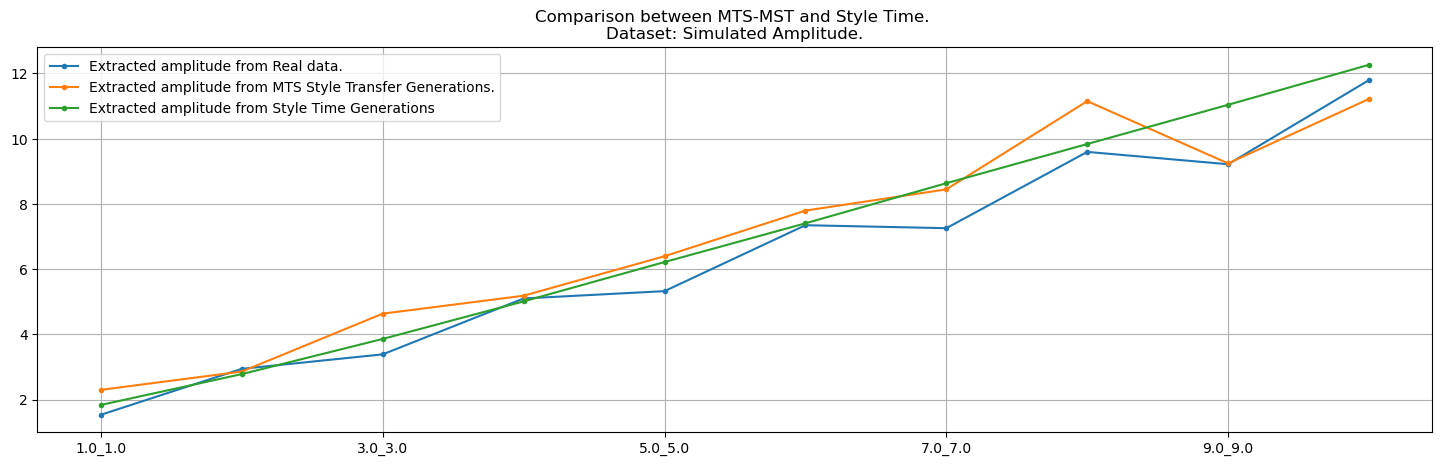

In [3]:
mts_mst_amplitude_metric = pd.read_hdf(f"{MTS_STYLE_TRANSFER_FOLDER}/ampl_metric.h5")
st_amplitude_metric = pd.read_hdf(f"{STYLE_TIME_FOLDER}/ampl_metric.h5")

plt.figure(figsize=(18, 5))
ax = plt.subplot(111)
ax.set_title("Comparison between MTS-MST and Style Time. \nDataset: Simulated Amplitude.")

mts_mst_amplitude_metric["Real"].plot(label='Extracted amplitude from Real data.', style='.-')
mts_mst_amplitude_metric["Fake"].plot(label='Extracted amplitude from MTS Style Transfer Generations.', style='.-')

st_amplitude_metric["Fake"].plot(label='Extracted amplitude from Style Time Generations', style='.-')

ax.grid()
ax.legend()

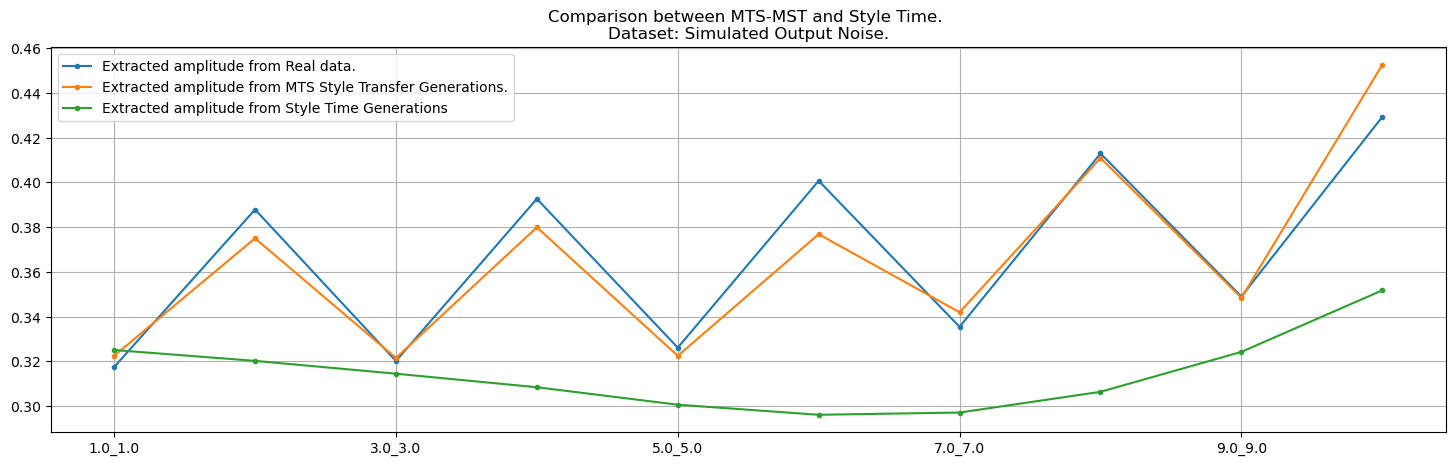

In [4]:
mts_mst_noise_metric = pd.read_hdf(f"{MTS_STYLE_TRANSFER_FOLDER}/noise_metric.h5")
st_noise_metric = pd.read_hdf(f"{STYLE_TIME_FOLDER}/noise_metric.h5")

plt.figure(figsize=(18, 5))
ax = plt.subplot(111)
ax.set_title("Comparison between MTS-MST and Style Time. \nDataset: Simulated Output Noise.")

mts_mst_noise_metric["Real"].plot(label='Extracted amplitude from Real data.', style='.-')
mts_mst_noise_metric["Fake"].plot(label='Extracted amplitude from MTS Style Transfer Generations.', style='.-')

st_noise_metric["Fake"].plot(label='Extracted amplitude from Style Time Generations', style='.-')

ax.grid()
ax.legend()

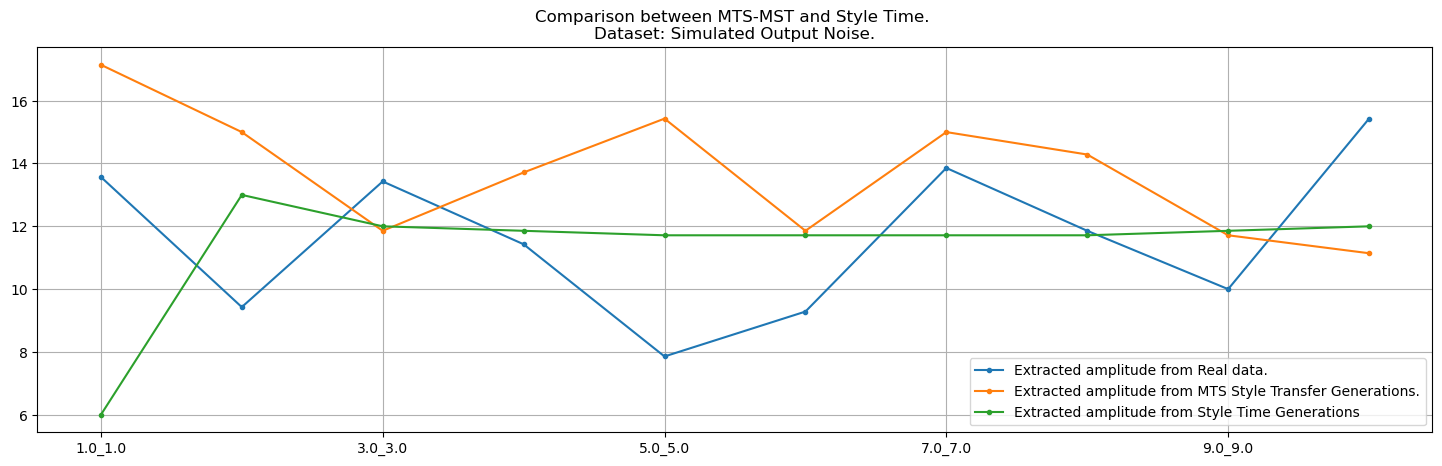

In [6]:
mts_mst_time_shift_metric = pd.read_hdf(f"{MTS_STYLE_TRANSFER_FOLDER}/time_shift_metric.h5")
st_time_shift_metric = pd.read_hdf(f"{STYLE_TIME_FOLDER}/time_shift_metric.h5")

plt.figure(figsize=(18, 5))
ax = plt.subplot(111)
ax.set_title("Comparison between MTS-MST and Style Time. \nDataset: Simulated Output Noise.")

mts_mst_time_shift_metric["Real"].plot(label='Extracted amplitude from Real data.', style='.-')
mts_mst_time_shift_metric["Fake"].plot(label='Extracted amplitude from MTS Style Transfer Generations.', style='.-')

st_time_shift_metric["Fake"].plot(label='Extracted amplitude from Style Time Generations', style='.-')

ax.grid()
ax.legend()

# TSTR

In [7]:
# real_columns = [f"{sn}_real" for sn in style_names]
# gen_columns = [f"{sn}_gen" for sn in style_names]

# real_valid_accs = tstr_stats[real_columns].values.reshape((-1,))
# gen_valid_accs = tstr_stats[gen_columns].values.reshape((-1,))


# plt.figure(figsize=(10, 5))
# plt.title("Accuracy of method.")

# plt.plot(real_valid_accs, '.-', label='Train on Real Acc')
# plt.plot(gen_valid_accs, '.-', label='Train on Generated Acc')
# plt.ylim((-0.01, 1.01))
# plt.xticks()
# plt.grid()
# plt.legend()
# plt.savefig(f"{MODEL_TO_EVALUATE}/acc_results.png")
# plt.show()

In [8]:
mst_mst_tstr_result_file = f"{MTS_STYLE_TRANSFER_FOLDER}/tstr.h5"
st_tstr_result_file = f"{STYLE_TIME_FOLDER}/tstr.h5"

mts_mst_results = pd.read_hdf(mst_mst_tstr_result_file)
st_results = pd.read_hdf(st_tstr_result_file)


In [9]:
mts_mst_results

,1.0_1.0_real,1.0_1.0_gen,2.0_2.0_real,2.0_2.0_gen,3.0_3.0_real,3.0_3.0_gen,4.0_4.0_real,4.0_4.0_gen,5.0_5.0_real,5.0_5.0_gen,6.0_6.0_real,6.0_6.0_gen,7.0_7.0_real,7.0_7.0_gen,8.0_8.0_real,8.0_8.0_gen,9.0_9.0_real,9.0_9.0_gen,10.0_10.0_real,10.0_10.0_gen
0,0.994742,0.246049,0.99994,0.420147,0.999354,0.113266,1.0,0.082542,1.0,0.232752,1.0,0.276848,1.0,0.31869,1.0,0.170673,1.0,0.216376,1.0,0.147626


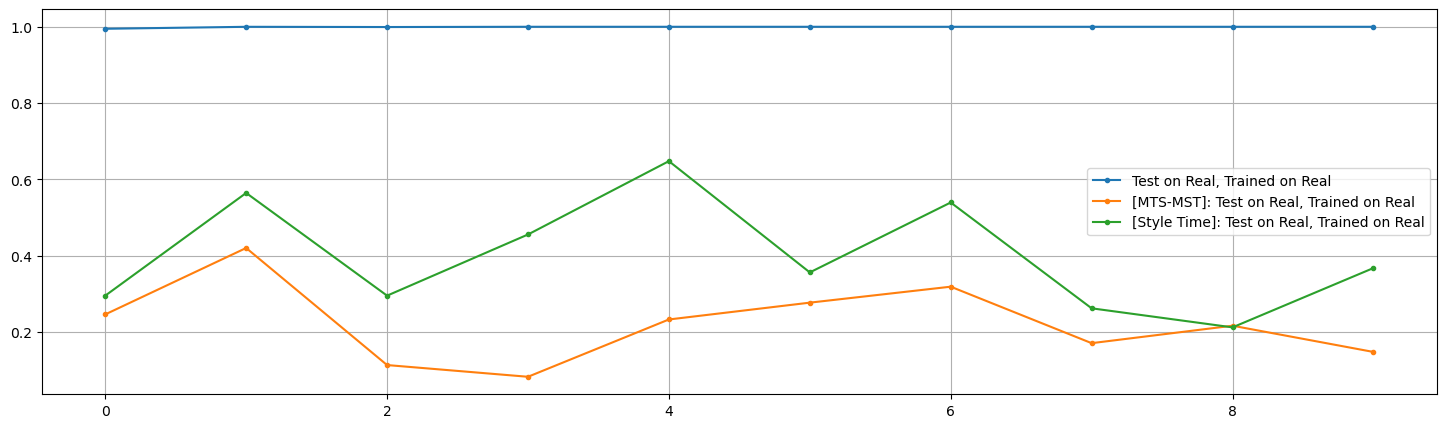

In [10]:
real_cols = mts_mst_results.filter(like='real', axis=1).columns
fake_cols = mts_mst_results.filter(like='gen', axis=1).columns

plt.figure(figsize=(18, 5))
ax = plt.subplot(111)

plt.plot(mts_mst_results[real_cols].values[0], ".-", label="Test on Real, Trained on Real")
plt.plot(mts_mst_results[fake_cols].values[0], ".-", label="[MTS-MST]: Test on Real, Trained on Real")

plt.plot(st_results[fake_cols].values[0], ".-", label="[Style Time]: Test on Real, Trained on Real")

ax.grid()
ax.legend()
